### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from textblob import TextBlob
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)
import sentiment_lib

### Parsing the entire dataset

reading in the dataset

In [2]:
df2 = []
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        if (filename.endswith('Tweets.CSV')):
            df2.append(pd.read_csv(os.path.join(dirname, filename), header=0, skiprows=lambda i: i!=0 and (i) % 50 != 0))
df = pd.concat(df2, axis=0, ignore_index=True)
df = pd.concat(df2, axis=0, ignore_index=True)
df.shape


(172838, 22)

Preprocessing the data, dropping columns

In [3]:
tweet = df.copy()
tweet.drop(['country_code','status_id','user_id','screen_name','source','reply_to_status_id','reply_to_user_id','is_retweet','place_full_name','place_type','reply_to_screen_name','is_quote','followers_count','friends_count','account_lang','account_created_at','verified'],axis=1, inplace = True)
tweet = tweet[(tweet.lang == "en")].reset_index(drop = True)
tweet.drop(['lang'],axis=1,inplace=True)
tweet.head()

,created_at,text,favourites_count,retweet_count
0,2020-04-05T00:00:00Z,'Stay home because our daddy can't' Viral phot...,18083,1
1,2020-04-05T00:00:04Z,Find out How to Do Business #LikeACanadian in ...,1056,0
2,2020-04-05T00:00:09Z,President Donald Trump says the United States ...,405,0
3,2020-04-05T00:00:15Z,We have recently had #OFDA members contact the...,348,0
4,2020-04-05T00:00:35Z,The Pandemic Archive Project\nA Call For Coron...,12411,0


Removing Special Characters and tokens

In [4]:
for i in range(tweet.shape[0]) :
    tweet['text'][i] = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(#[A-Za-z0-9]+)", " ", tweet['text'][i]).split()).lower()
tweet.head()

,created_at,text,favourites_count,retweet_count
0,2020-04-05T00:00:00Z,stay home because our daddy can t viral photo ...,18083,1
1,2020-04-05T00:00:04Z,find out how to do business likeacanadian in a...,1056,0
2,2020-04-05T00:00:09Z,president donald trump says the united states ...,405,0
3,2020-04-05T00:00:15Z,we have recently had ofda members contact the ...,348,0
4,2020-04-05T00:00:35Z,the pandemic archive project a call for corona...,12411,0


Removing Stopwords

In [5]:
sentiment_lib.remove_stopwords(tweet)
sentiment_lib.remove_letter(tweet)
tweet.head()

,created_at,text,favourites_count,retweet_count
0,2020-04-05T00:00:00Z,stay home daddy viral photo shows nurse separa...,18083,1
1,2020-04-05T00:00:04Z,find business likeacanadian crisis webinar cov...,1056,0
2,2020-04-05T00:00:09Z,president donald trump says united states head...,405,0
3,2020-04-05T00:00:15Z,recently ofda members contact office regarding...,348,0
4,2020-04-05T00:00:35Z,pandemic archive project call coronavirus rela...,12411,0


### Wordcloud of the most common words

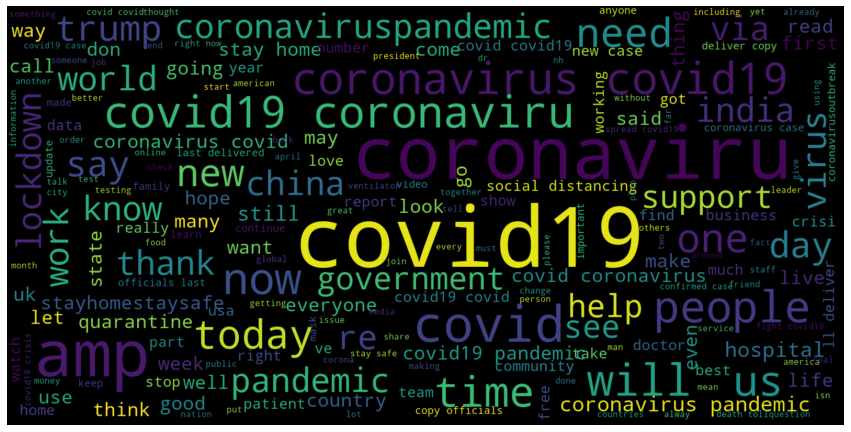

In [6]:
sentiment_lib.show_wordcloud(tweet['text'])

### Identifying sentiment of each tweet in the dataset

Creating the tweet.sentiment column and calculating the sentiment of each tweet

In [7]:
sentiment_lib.sentiment_bins(tweet)

Showing the number of tweets of each sentiment

positive    43638
neutral     33762
negative    18829
Name: sentiment, dtype: int64


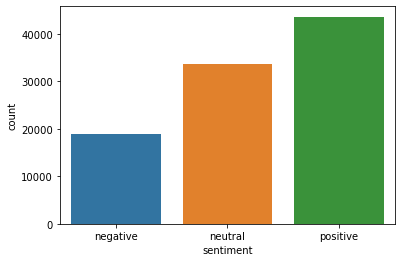

In [8]:
print(tweet.sentiment.value_counts())
sns.countplot(x='sentiment', data = tweet)
plt.show()

Showing the tendency of tweets sentiment changing over days

Displaying sentiment over time


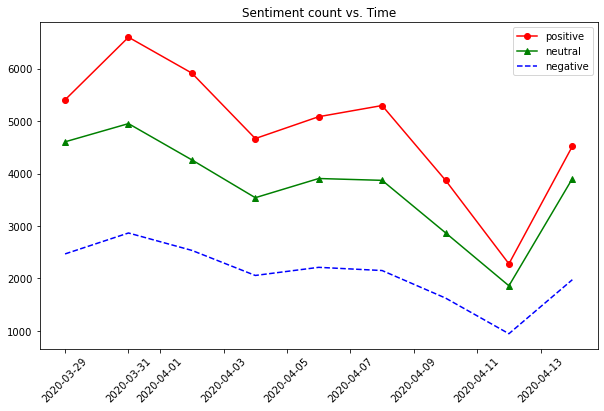

In [9]:
print("Displaying sentiment over time")
sentiment_lib.sentiment_over_time(tweet)

### Calculating the frequency of most commonly occurring words in each sentiment

In [10]:
all_words = []
all_words = [word for i in tweet.text for word in i.split() if len(word) !=1 or not isinstance(word,int)]
all_freq = sentiment_lib.get_freq(all_words)

### Word cloud of the most commonly occurring positive words

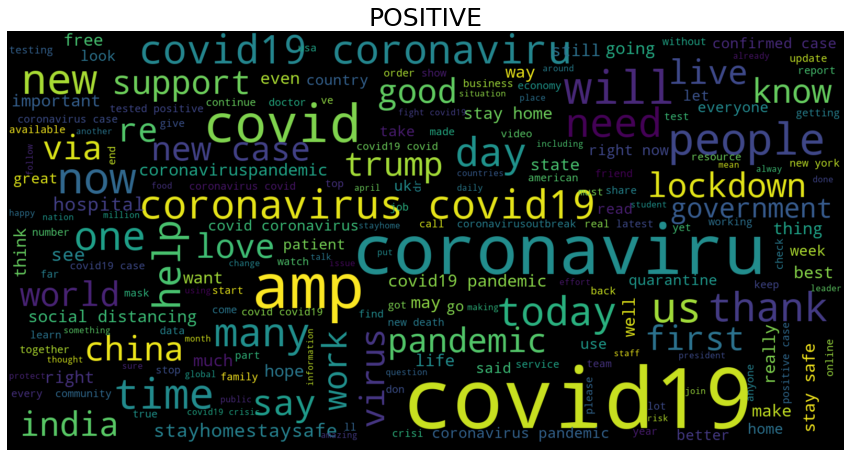

In [11]:
pos_words=sentiment_lib.count_words(tweet,'positive')
pos_freq = sentiment_lib.get_freq([word for i in pos_words for word in i.split()])
sentiment_lib.show_wordcloud(pos_words , 'POSITIVE')

### Word cloud of the most commonly occurring negative words

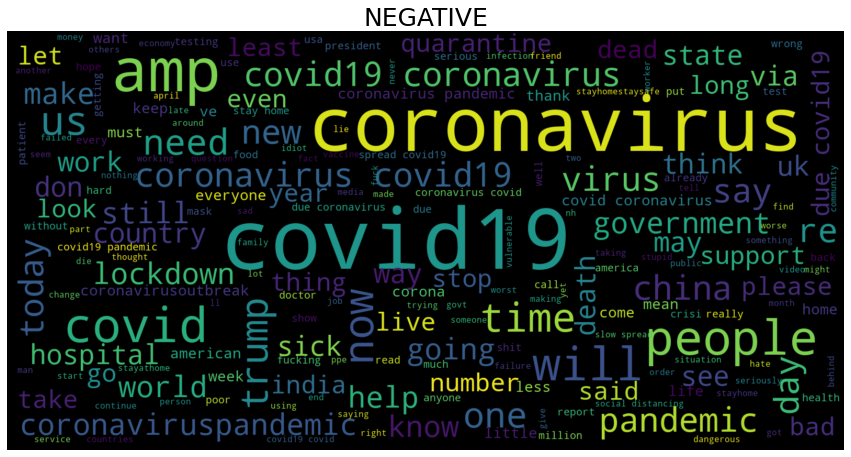

In [12]:
neg_words=sentiment_lib.count_words(tweet,'negative')
neg_freq = sentiment_lib.get_freq([word for i in neg_words for word in i.split()])
sentiment_lib.show_wordcloud(neg_words , 'NEGATIVE')

### Word cloud of the most commonly occurring neutral words

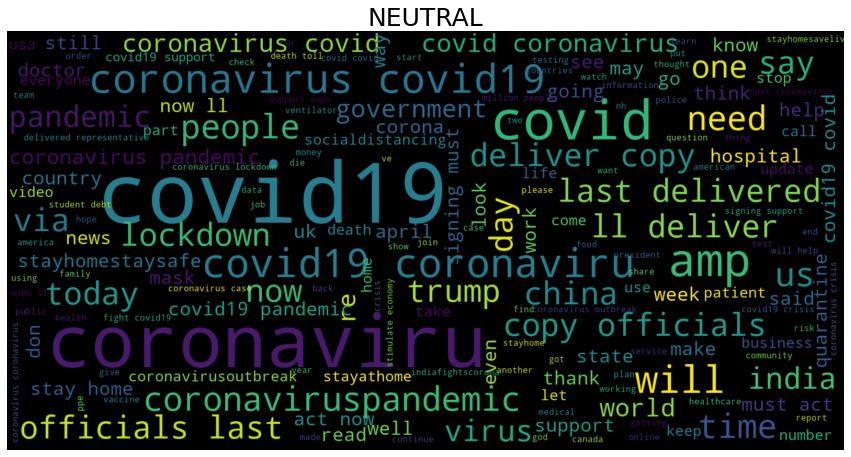

In [13]:
neutral_words=sentiment_lib.count_words(tweet,'neutral')
net_freq = sentiment_lib.get_freq([word for i in neutral_words for word in i.split()])
sentiment_lib.show_wordcloud(neutral_words , 'NEUTRAL')

### Calculating the frequency of given keywords in each sentiment
Taking sets of keywords and calculating the number of tweets of each sentiment type that contain those keywords, and the frequency of each word in the keywords list as they occur in all the tweets

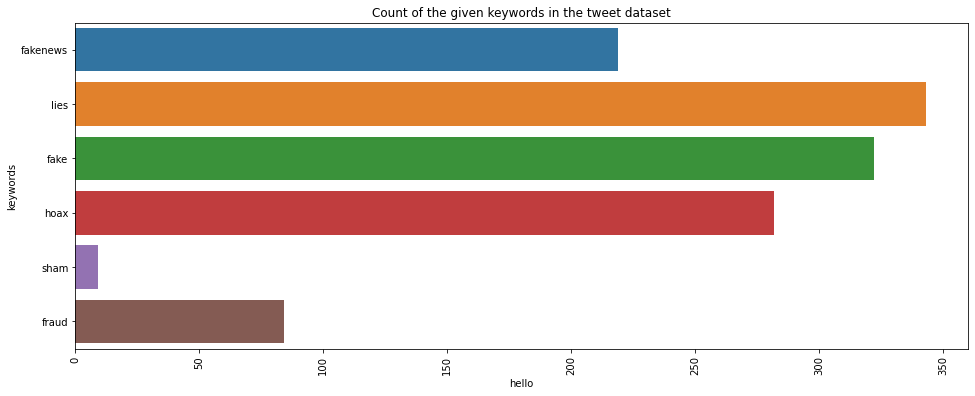

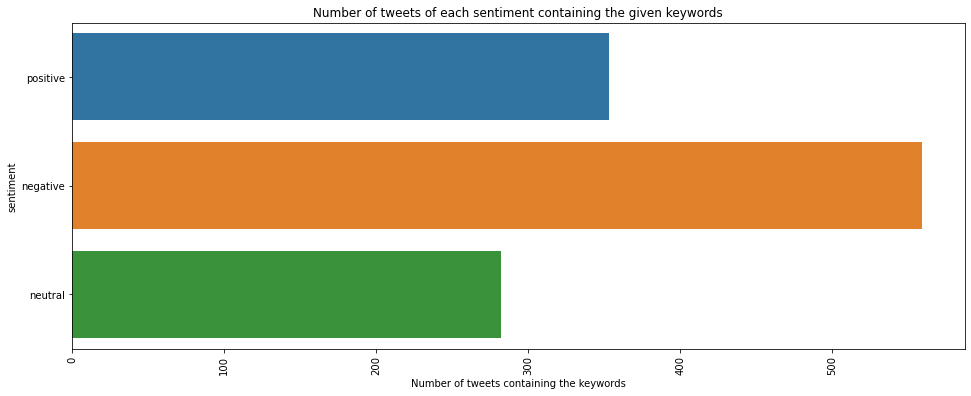

In [14]:
sentiment = ['positive', 'negative', 'neutral']

hoax = ['fakenews', 'lies', 'fake', 'hoax', 'sham', 'fraud']
freq_tweets,count_words = sentiment_lib.finding_sentiment(tweet,hoax)
sentiment_lib.bar_graph2(hoax, count_words, 'Count of the given keywords in the tweet dataset', xtitle="hello", ytitle="keywords")
sentiment_lib.bar_graph2(sentiment,freq_tweets, 'Number of tweets of each sentiment containing the given keywords', "Number of tweets containing the keywords","sentiment")



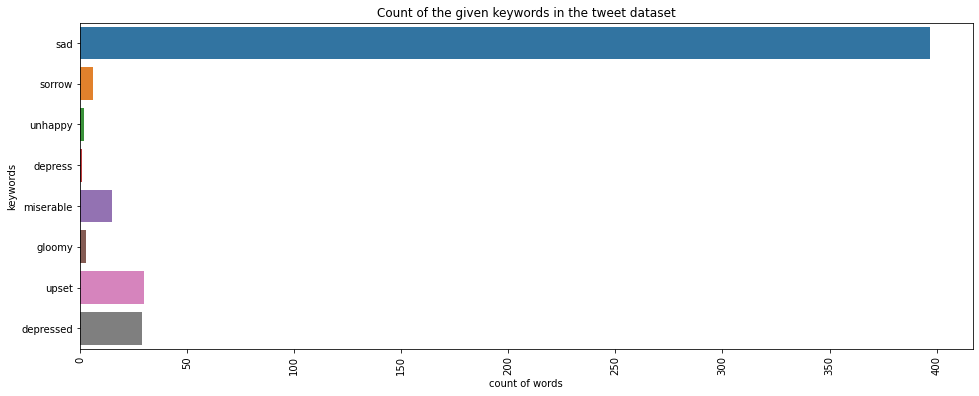

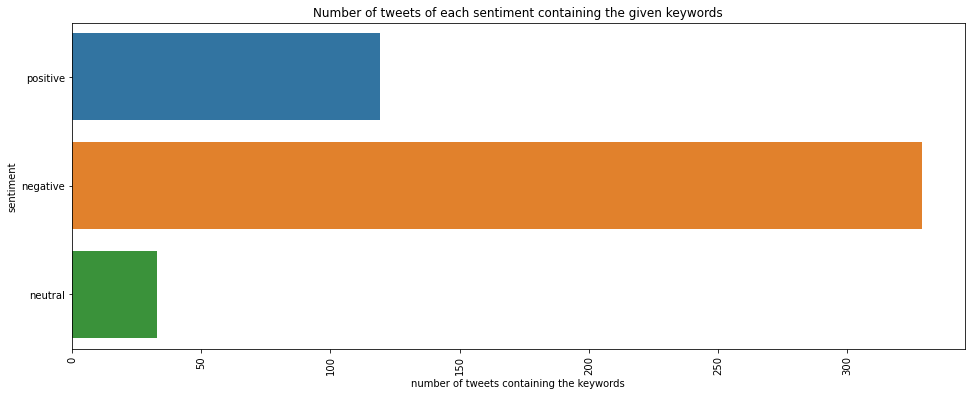

In [15]:
sorrow = ['sad', 'sorrow', 'unhappy', 'depress', 'miserable', 'gloomy', 'upset', 'depressed']
freq_tweets,count_words = sentiment_lib.finding_sentiment(tweet,sorrow)
sentiment_lib.bar_graph2(sorrow, count_words, 'Count of the given keywords in the tweet dataset', 'count of words', 'keywords')
sentiment_lib.bar_graph2(sentiment,freq_tweets, 'Number of tweets of each sentiment containing the given keywords', 'number of tweets containing the keywords','sentiment')

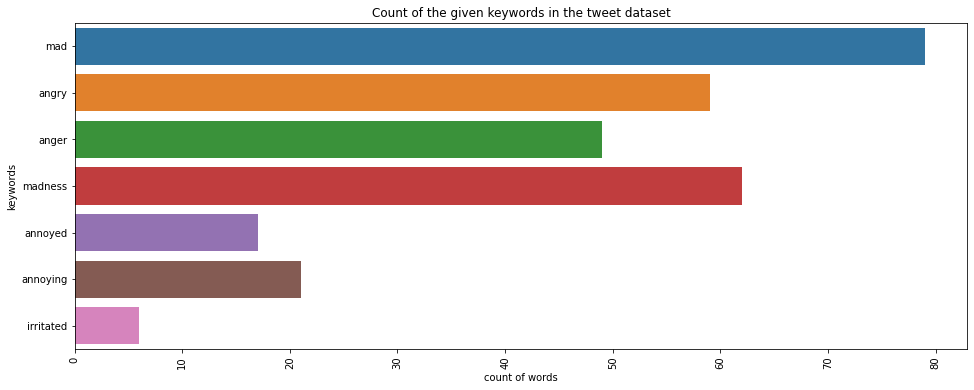

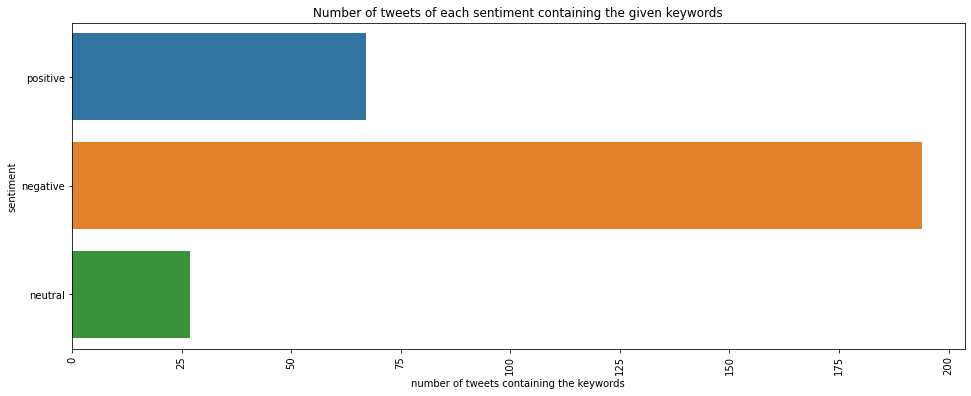

In [16]:
madness = ['mad', 'angry', 'anger', 'madness', 'annoyed', 'annoying', 'irritated']
freq_tweets,count_words = sentiment_lib.finding_sentiment(tweet,madness)
sentiment_lib.bar_graph2(madness, count_words, 'Count of the given keywords in the tweet dataset', 'count of words', 'keywords')
sentiment_lib.bar_graph2(sentiment,freq_tweets, 'Number of tweets of each sentiment containing the given keywords', 'number of tweets containing the keywords','sentiment')

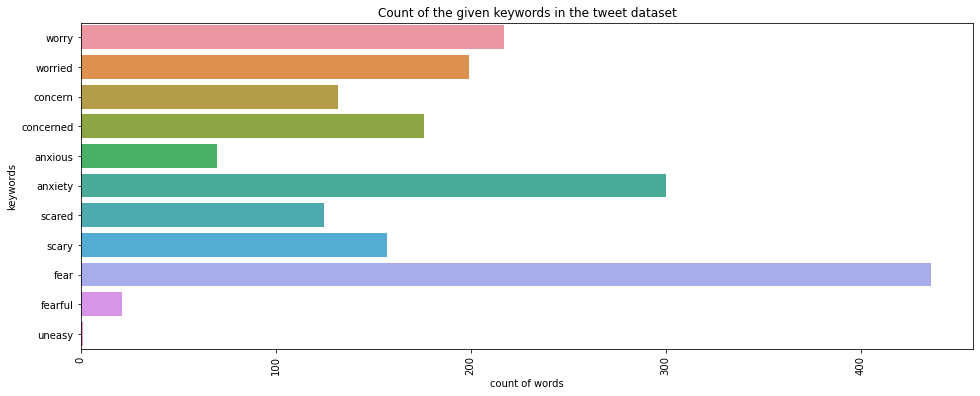

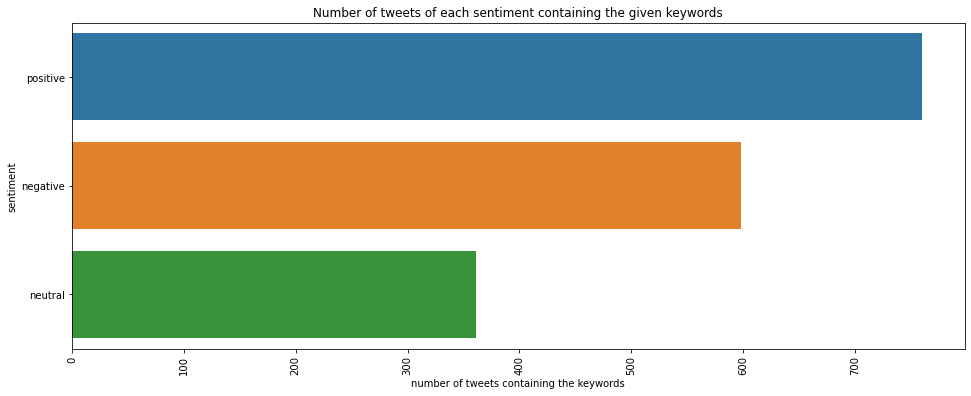

In [17]:
concern = ['worry', 'worried', 'concern', 'concerned', 'anxious', 'anxiety', 'scared', 'scary', 'fear', 'fearful', 'uneasy']
freq_tweets,count_words = sentiment_lib.finding_sentiment(tweet,concern)
sentiment_lib.bar_graph2(concern, count_words, 'Count of the given keywords in the tweet dataset', 'count of words', 'keywords')
sentiment_lib.bar_graph2(sentiment,freq_tweets, 'Number of tweets of each sentiment containing the given keywords', 'number of tweets containing the keywords','sentiment')

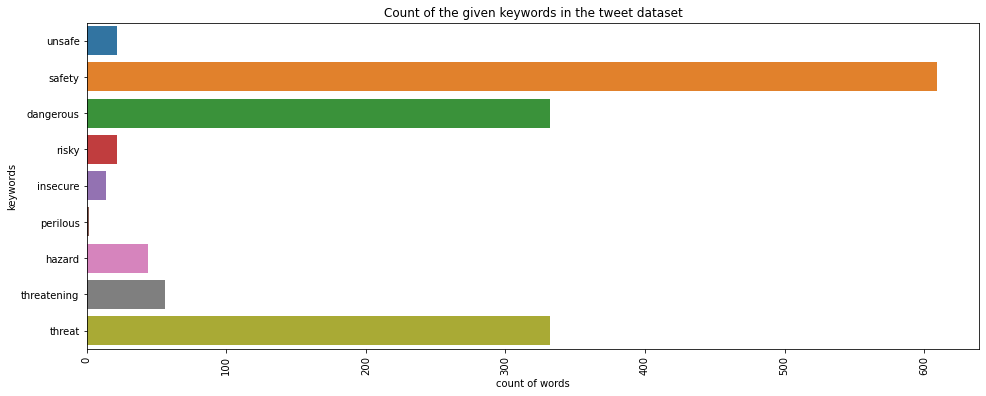

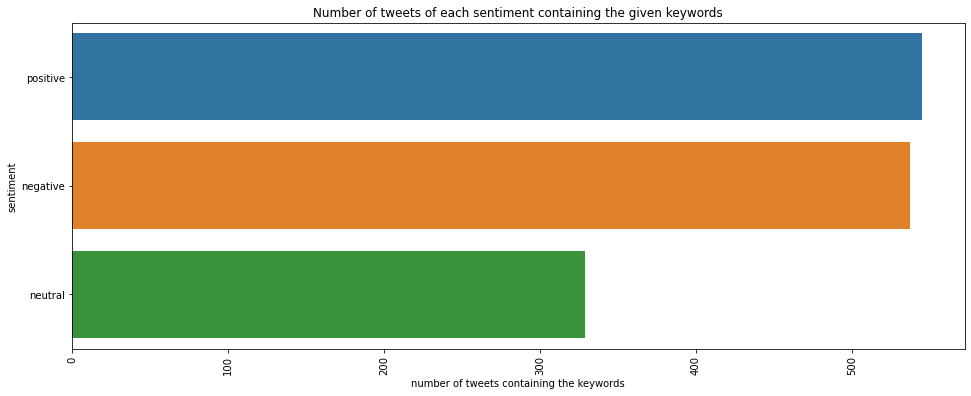

In [18]:
danger = ['unsafe', 'safety', 'dangerous', 'risky', 'insecure', 'perilous', 'hazard', 'threatening', 'threat']
freq_tweets,count_words = sentiment_lib.finding_sentiment(tweet,danger)
sentiment_lib.bar_graph2(danger, count_words, 'Count of the given keywords in the tweet dataset', 'count of words', 'keywords')
sentiment_lib.bar_graph2(sentiment,freq_tweets, 'Number of tweets of each sentiment containing the given keywords', 'number of tweets containing the keywords','sentiment')

Government Sentiment Analysis

positive    3230
neutral     2530
negative    2208
Name: sentiment, dtype: int64


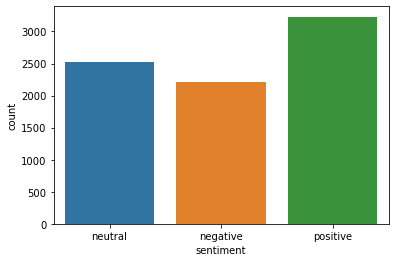

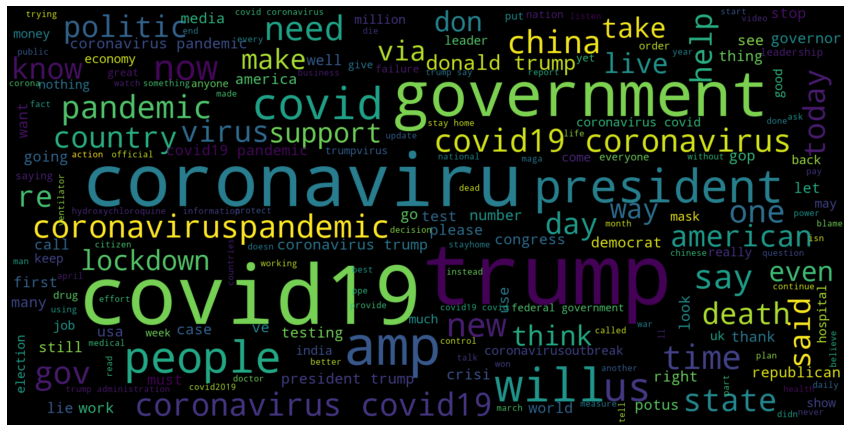

,text,sentiment,polarity
0,president donald trump says united states heading toughest weeks coronavirus cases swell nationwide warned states inflate needs critical medical equipment covid19,neutral,0
1,covid 19 deaths michigan 40 blacks likely due poor access healthcare amp high density cities msnbc foxnews nytimes cnn wsj cnbc politico huffpost drudge bbc gop npr dailykos thehill wapo nbc cbs ap slate aarp,negative,-0.09125
2,coronavirus timeline jan 14 states chinese authorities evidence covid 19 contagious jan 21 dr fauci states covid 19 major threat usa jan 31 potus implements china travel ban feb 24 pelosi visits chinatown amp urges people come,positive,0.03125
3,astonishingly reckless claim trump campaign official covid19 coronavirus,positive,0.5
4,great article cobol 2018 bookmarked awhile ago many legacy banking government applications expected pandemic make relevant need unprecedented stimulus checks cut covid19,positive,0.44


In [19]:
gov_sent_df = tweet.copy()
government_sentiments = ['government', 'trump', 'gov', 'politics', 'president', 'presidency', 'congress',
                         'senate', 'election', 'scotus', 'gop', 'potus', 'democrat', 'republican']
gov_sent_df = sentiment_lib.finding_government_sentiment(gov_sent_df, government_sentiments)
sentiment_lib.sentiment_bins(gov_sent_df)
print(gov_sent_df.sentiment.value_counts())
sns.countplot(x='sentiment', data=gov_sent_df)
plt.show()

sentiment_lib.show_wordcloud(gov_sent_df['text'])


gov_sent_df.head()

### Training a CNN model to analyze the tweets sentiment

Using the sentiment_bins function defined in sentiment_lib, we can calculate the tweets sentiment. But there could be mistakes in classifications by this function.
<br>Implementing a classification model using CNN with tweets words(encoded) as features.
<br>Achieved 81% accuracy to identify the negative sentiment from tweets.



First, encoding the tweets text. 
Creating an array that contains integer encoded version of words in tweets. The word appearing the most will be marked as 1, one appearing the second most will be marked as 2 and so on.

In [20]:
wordslist = tweet['text'].apply(lambda dfs: dfs.split())
tweet_words = []
for sublist in wordslist:
    for word in sublist:
        tweet_words.append(word)
words_count = Counter(tweet_words) # calculate the frequency of each word
vocab = sorted(words_count, key=words_count.get, reverse=True)
vocab_to_int = {word:ii for ii, word in enumerate(vocab, 1)}

encoded_tweets = []
for sublist in wordslist:
    encoded_tweets.append([vocab_to_int[word] for word in sublist])

In [21]:
print("%d words in all"%(len(vocab_to_int)))
print(encoded_tweets[:10]) # the first 10 encoded tweets

101640 words in all
[[23, 16, 5315, 976, 1344, 466, 875, 6067, 112, 65, 2, 1038], [167, 118, 41426, 33, 493, 1, 2278, 9408], [136, 1026, 19, 90, 392, 156, 3030, 9409, 159, 2, 9, 13483, 1805, 1546, 156, 23631, 183, 430, 84, 503, 1], [1183, 41427, 366, 329, 592, 848, 29258, 604, 3844, 848, 41428, 1, 252, 1178, 31, 1472, 496, 333, 7991, 691, 83], [10, 9410, 1174, 152, 2, 378, 838, 2354, 2007, 831, 443, 838, 1123, 2354, 4920, 2, 10, 11761, 11762, 11763, 11764, 10442, 443, 2993, 1], [23632, 86, 140, 3129, 246, 5545, 1993, 2, 32, 165, 13484, 176, 87, 660], [4828, 864, 797, 3, 4, 5199, 29259, 42, 41429, 1, 23633], [128, 125, 41430, 139, 1], [125, 2931, 12, 9, 2, 11, 41431, 553, 41432, 367, 41433, 447, 41434, 186, 29260, 41, 1, 258, 305], [1201, 5316, 310, 29261, 27, 44, 587, 1]]


Then labeling the sentiments

At first we tried a multicalssification model, but the accuracy is rather low, around 50%.
Since detecting negative sentiment is much more important than other two sentiments in the pandemic, in our opinion, we change it into a 0-1 classification model which detects negative sentiment from tweet text. 

In [22]:
labels = []
for sen in tweet.sentiment:
    if sen=='negative':
        labels.append(1)
    #elif sen=='neutral':
    #   labels.append(2)
    else:
        labels.append(0)

Padding data to get constant tweets length

In [23]:
tweets_len = Counter([len(sublist) for sublist in wordslist])
print(max(tweets_len))

58


In [24]:
def pad_features(tweets, tweet_length):
    features = np.zeros((len(tweets), tweet_length), dtype=int)
    for i, row in enumerate(tweets):
        if len(row)!=0:
            features[i, :len(row):] = np.array(row)
    return features

tweet_length = 60
padded_features= pad_features(encoded_tweets, tweet_length)
print(padded_features[:2]) # show the padded features after processing

[[   23    16  5315   976  1344   466   875  6067   112    65     2  1038
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0]
 [  167   118 41426    33   493     1  2278  9408     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0]]


Normalizing and reshaping the data

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.layers import UpSampling2D

In [26]:
indices = np.arange(len(encoded_tweets))
ntrain = int(len(encoded_tweets)*0.8)
ntest = len(encoded_tweets)-ntrain
# Split 80% into training sets, and 20% into test sets
x_train, x_test, y_train, y_test, train_ind, test_ind = train_test_split(padded_features, labels, indices, test_size=0.2, random_state=1)

# Scale features. Fit scaler on training only.
scaler = MinMaxScaler() #scale features between 0 and 1
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Reshape
x_train1 = x_train.reshape(ntrain,10,6,1)
x_test1 = x_test.reshape(ntest,10,6,1)

#Create labels as one-hot vectors
labels_train = tf.keras.utils.to_categorical(y_train)
labels_test = tf.keras.utils.to_categorical(y_test)

In [27]:
labels_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

**CNN:**
* Input: 10x6x1 
* 1st hidden: 2D convolutional layer with 256 feature maps and 3x3 filters.
* 2nd hidden: A 2x2 maxpool layer.
* 3rd hidden: 2D convolutional layer with 128 feature maps and 3x3 filters.
* 4th hidden: A 2x2 maxpool layer.
* 5th hidden: Flatten layer to map 2D to 1D vector.
* 6th hidden: Dense layer of 100 perceptrons.
* 7th hidden: Dense layer of 100 perceptrons.
* Output: 10 perceptrons for classification.
<br>Loss function: binary crossentropy
<br>Optimizer: 'adam'
<br>Train for 20 epochs

In [28]:
def CNN():

    model = tf.keras.models.Sequential()
    #1st hidden: Set up the first conv layer
    model.add(Conv2D(256,(3,3),activation="relu",input_shape=(10,6,1),padding='same'))
    #2nd hidden: Set up the first maxpooling layer
    model.add(MaxPooling2D(pool_size=(2,2)))
    #3rd hidden: Set up the second conv layer
    model.add(Conv2D(128,(3,3),activation="relu",padding='same'))
    #4th hidden: Set up the second maxpooling layer
    model.add(MaxPooling2D(pool_size=(2,2)))
    #5th hidden: Set up the flatten layer
    model.add(Flatten())
    #6th hidden: Set up the first dense layer
    model.add(Dense(100,activation='sigmoid'))
    #7th hidden: Set up the second dense layer
    model.add(Dense(100,activation='softmax'))
    #Output: Set up the third dense layer
    model.add(Dense(10,activation='tanh'))
    model.add(Dense(2,activation='tanh'))
    
    return model

#Compile and train the model
CNN = CNN()
CNN.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
print(CNN.summary())
history = CNN.fit(x_train1, labels_train, epochs=20, batch_size=100, shuffle=True)
scores = CNN.evaluate(x_test1, labels_test)
print("Accuracy: %.2f%%" %(scores[1]*100))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 10, 6, 256)        2560      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 5, 3, 256)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 3, 128)         295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               25700     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               1

In [29]:
def sentiment_cnn(tweet_text):
    encoded_text = [vocab_to_int[word] for word in tweet_text.split()]
    padded_text = np.zeros((1, tweet_length), dtype=int)
    padded_text[0,:len(encoded_text):] = np.array(encoded_text)
    padded_text = padded_text.reshape(1,10,6,1)
    l = list(CNN.predict(padded_text))
    return 'positive/neutal' if l.index(max(l))==0 else 'negative'

In [30]:
ind = np.random.randint(len(encoded_tweets))
print(ind)
tweet_text = tweet.text[ind]
print('tweet text:',tweet_text)
print('The analysis of tweet sentiment:',sentiment_cnn(tweet_text))

78962
tweet text: saying right now don football season covid19 going hunger strike raiders
The analysis of tweet sentiment: positive/neutal


### Finding Sentiment Distribution

<Figure size 720x432 with 0 Axes>

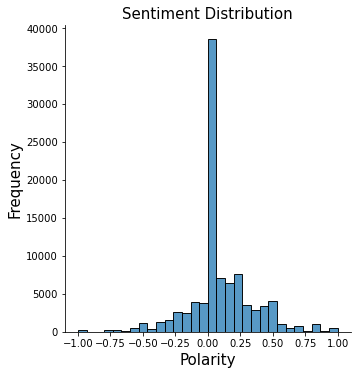

In [31]:
plt.figure(figsize=(10,6))
# uses polarity column to find all polarities
sns.displot(tweet['polarity'], bins=30)
plt.title('Sentiment Distribution',size = 15)
plt.xlabel('Polarity',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show()